In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import statsmodels.api as sm

In [2]:
# import dataframes
bikes_df =pd.read_csv(r"B:\LHL\StatsModeling_Project\LHL-statsModeling-priject\data\bikes_df.csv",sep=',')
places_df =pd.read_csv(r"B:\LHL\StatsModeling_Project\LHL-statsModeling-priject\data\places_df.csv",sep=',')
joinned_df = pd.read_csv(r'B:\LHL\StatsModeling_Project\LHL-statsModeling-priject\data\joinned_df.csv',sep=',')

bikes_df = bikes_df.rename(columns={"id":"station_id", 'name':'station_name', 'latitude': 'station_latitude', 'longitude':'station_longitude'})
places_df = places_df.rename(columns={'name':'place_name','id':'place_id','rating':'place_rating','latitude': 'place_latitude', 'longitude':'place_longitude'})
joinned_df

,station_name,place_name,bar,dog_park,restaurant,distance,place_latitude,place_longitude,station_latitude,station_longitude,slots,free_bikes,empty_slots,place_rating
0,Riverside Museum,Dukes,1.0,0.0,0.0,838.518390,55.866966,-4.292194,55.865683,-4.305367,6,6,0,4.4
1,Riverside Museum,BrewDog Glasgow,1.0,0.0,0.0,871.079804,55.867702,-4.291878,55.865683,-4.305367,6,6,0,4.3
2,Riverside Museum,6 Degrees North,1.0,0.0,0.0,854.560573,55.870835,-4.315485,55.865683,-4.305367,6,6,0,4.2
3,Riverside Museum,Nam Tuk,0.0,0.0,1.0,596.695005,55.869846,-4.299887,55.865683,-4.305367,6,6,0,4.7
4,Parkhead,Old Black Bull,1.0,0.0,0.0,636.954617,55.852070,-4.200545,55.846524,-4.197475,8,4,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Knightswood Park,Lincoln Inn,1.0,0.0,0.0,553.814985,55.899938,-4.349245,55.895974,-4.354877,10,1,9,2.0
111,Knightswood Park,New Dragon Inn,1.0,0.0,0.0,818.569003,55.896633,-4.341972,55.895974,-4.354877,10,1,9,0.0
112,Fullarton,Kimberley,1.0,0.0,0.0,678.130598,55.843273,-4.170313,55.837175,-4.170209,12,6,6,0.0
113,Fullarton,Elders Bar,1.0,0.0,0.0,427.682480,55.840632,-4.171166,55.837175,-4.170209,12,6,6,0.0


Build a regression model.

x = rating 
y = slots


<Axes: xlabel='slots', ylabel='place_rating'>

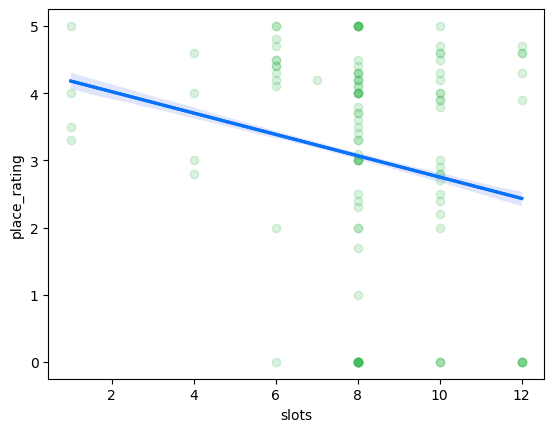

In [3]:
x = list(joinned_df['slots'])
y = list(joinned_df['place_rating'])

plt.scatter(x, y, color = '#42bd5b', alpha=0.2)
sns.regplot(x='slots', y='place_rating', data = joinned_df, scatter= False, ci=25, fit_reg=True, color='#2b58ed')
sns.regplot(x='slots', y='place_rating', data = joinned_df, scatter= False, ci=0, fit_reg=True, color='#0573fa')

Provide model output and an interpretation of the results. 

In [4]:
x= sm.add_constant(x)
lin_reg = sm.OLS(y,x)

model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4.880
Date:                Mon, 21 Oct 2024   Prob (F-statistic):             0.0292
Time:                        13:12:03   Log-Likelihood:                -223.92
No. Observations:                 115   AIC:                             451.8
Df Residuals:                     113   BIC:                             457.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3382      0.607      7.147      0.0

## Interpretation of number of bike slots in a bike stations and the ratings of places around said bike station
### **Notable Values**
`alpha`= 0.05<br>
`R^2^` = 0.041 <br>
`p>|t|` = 0.029<br>
`f-statisitc` = 4.880<br>
`Prob(f-statisitc)`= .00592<br>

 ### **Summary** 
The null hypothesis is rejected as the `Prob(f-statisitc)` is under the `alpha`. There is a relationship between the number of slots and the ratings of places around that bike station. This being said, the `R^2^` value is fairly low showing that the model doesn't fit well with the data. While is there a relationship between number of slots and the ratings around the bike stations as is shown by the `p>|t|` value and `Prob(f-statisitc)` value, it is clear there are more variables that effecting the ratings

# Stretch

How can you turn the regression model into a classification model?